# Importing Core Libraries for Data Science and Visualization

In [6]:
# --- Core Data Science Libraries ---
import pandas as pd  # For data manipulation, I/O, and analysis using DataFrames
import numpy as np   # For numerical operations and N-dimensional array support

# --- Visualization Libraries ---
import matplotlib.pyplot as plt # The primary plotting library
import seaborn as sns           # High-level interface for statistical graphics

# --- Environment-Specific & Statistical Utilities ---
from google.colab import files  # Utility for file upload/download in Google Colab notebooks
from scipy.stats import pearsonr # Function to calculate the Pearson correlation coefficient

This code imports the core Python libraries needed for data analysis and visualization. Pandas and NumPy handle data and numerical operations, Matplotlib and Seaborn enable plotting, while SciPy supports statistical tests. The Google Colab files module is included for easy file handling in notebooks.

In [4]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Import below libraries
import gdown
import pandas as pd

# Step 3: Set the file ID and create a download URL
# E.g. for uber_data.csv the URL is  --https://drive.google.com/file/d/1W3U9RCBPYLgERwfM1wH0pag80n6tdXup/view?usp=sharing
#https://drive.google.com/file/d/1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP/view?usp=drive_link

file_id = "1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "uber_data.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame (change name according to your choice)
data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP
From (redirected): https://drive.google.com/uc?id=1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP&confirm=t&uuid=cc63d186-535a-4988-b090-6829ba46e6ea
To: /content/uber_data.csv
100%|██████████| 1.47G/1.47G [00:18<00:00, 79.0MB/s]


The code installs and uses gdown to download a dataset directly from Google Drive using its file ID. The file is saved locally as uber_data.csv and then loaded into a Pandas DataFrame for analysis. This approach simplifies accessing shared datasets in Google Colab without manual uploads.

## Viewing the First Few Rows of the Dataset

In [4]:
# Create a working copy to preserve the original DataFrame
df = data.copy()

# Checking the Dimensions of the Dataset

In [ ]:
# Unpack the shape tuple into separate variables
rows, columns = df.shape
# Print the dimensions using the new variables
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10000000
Number of columns: 17


# Missing Data Summary of the Dataset

In [ ]:
missing_summary = df.isnull().sum().to_frame('Count')
missing_summary['Percentage'] = missing_summary['Count'] * 100 / len(df)

print("Missing Data Summary:")
missing_filtered = missing_summary[missing_summary['Count'] > 0]

if missing_filtered.empty:
    print(" No missing values found in the dataset.")
else:
    display(missing_filtered.sort_values(by='Percentage', ascending=False)
                           .style.format({'Percentage': '{:.2f}%'}))


Missing Data Summary:
 No missing values found in the dataset.


The code calculates and displays the count and percentage of missing values for each column in the DataFrame. If no missing values are found, it reports accordingly; otherwise, it shows a sorted summary of columns with missing data, helping in identifying data quality issues for cleaning and preprocessing.

# Identifying Duplicate Rows in the Dataset

In [ ]:
# Directly print the sum of the boolean Series returned by .duplicated()
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


The code uses .duplicated().sum() to count the number of duplicate rows in the DataFrame. This helps detect redundancy in the dataset, which may need to be removed for accurate analysis and modeling.

# Removing Duplicate Rows from the Dataset

In [ ]:
# Store the original number of rows for comparison
original_row_count = df.shape[0]
print(f"Original number of rows: {original_row_count}")

# Remove duplicate rows, keeping the first instance
df = df.drop_duplicates(keep='first')

# Get the new row count
new_row_count = df.shape[0]

# Report the results
print(f"Number of rows after removing duplicates: {new_row_count}")
print(f"Number of duplicate rows removed: {original_row_count - new_row_count}")

Original number of rows: 10000000
Number of rows after removing duplicates: 9392429
Number of duplicate rows removed: 607571


The code first stores the original number of rows, then removes duplicate entries using drop_duplicates(keep='first'). It compares the row counts before and after cleaning, clearly reporting how many duplicate rows were removed. This ensures the dataset is free from redundancy for more reliable analysis.

# Handling Missing Values in Critical Columns

In [ ]:
# Define the critical columns where missing values are not acceptable
critical_columns = ['passenger_count', 'payment_type']

# Get the row count before cleaning
original_rows = len(df)
print(f"Number of rows before cleaning: {original_rows}")

# --- Data Cleaning: Handle Missing Values ---
# Remove rows with missing data in 'passenger_count' or 'payment_type'.
# This strategy is chosen because the percentage of missing values in these
# columns is negligible, so dropping them has a minimal impact on the dataset.
# The 'inplace=True' argument modifies the DataFrame directly.
df.dropna(subset=['passenger_count', 'payment_type'], inplace=True)

# Report the number of rows removed to track data loss
print(f"Number of rows after cleaning: {len(df)}")
print(f"Number of rows removed: {original_rows - len(df)}")

Number of rows before cleaning: 10000000
Number of rows after cleaning: 10000000
Number of rows removed: 0


The code defines passenger_count and payment_type as critical columns where missing values cannot be tolerated. It removes rows containing nulls in these fields and reports the data loss. Since the missing percentage is negligible, this cleaning step ensures data integrity without significantly reducing the dataset size.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   vendor_id              int64          
 1   pickup_datetime        datetime64[ns] 
 2   dropoff_datetime       datetime64[ns] 
 3   passenger_count        int64          
 4   trip_distance          float64        
 5   rate_code              int64          
 6   store_and_fwd_flag     object         
 7   payment_type           int64          
 8   fare_amount            float64        
 9   extra                  float64        
 10  mta_tax                float64        
 11  tip_amount             float64        
 12  tolls_amount           float64        
 13  imp_surcharge          float64        
 14  total_amount           float64        
 15  pickup_location_id     int64          
 16  dropoff_location_id    int64          
 17  trip_duration          timedelta64[ns]
 18  t

# Converting Pickup and Dropoff Columns to Datetime

In [4]:
# Convert pickup and dropoff columns to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

# Verify conversion
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

# Check for any remaining unconverted values
invalid_dates = df[df['pickup_datetime'].isna() | df['dropoff_datetime'].isna()]
print(f"Number of invalid date entries: {len(invalid_dates)}")



pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object
Number of invalid date entries: 0


The code converts pickup_datetime and dropoff_datetime columns to datetime format using pd.to_datetime(), enabling time-based analysis. It also checks for invalid or unconverted entries, reporting the number of rows with incorrect date values, which helps ensure accurate temporal analysis.

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9392429 entries, 0 to 9999988
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   vendor_id            int64         
 1   pickup_datetime      datetime64[ns]
 2   dropoff_datetime     datetime64[ns]
 3   passenger_count      int64         
 4   trip_distance        float64       
 5   rate_code            int64         
 6   store_and_fwd_flag   object        
 7   payment_type         int64         
 8   fare_amount          float64       
 9   extra                float64       
 10  mta_tax              float64       
 11  tip_amount           float64       
 12  tolls_amount         float64       
 13  imp_surcharge        float64       
 14  total_amount         float64       
 15  pickup_location_id   int64         
 16  dropoff_location_id  int64         
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.3+ GB


Observation:

The pickup_location_id, dropoff_location_id, and payment_type columns contain numerical codes. To make analysis easier, we will merge this data with location names and payment type descriptions.

# Mapping Payment Type Codes to Descriptive Labels

In [5]:
# Define custom payment mapping
payment_mapping = {
    1: "UPI",
    2: "Cash",
    3: "Credit/Debit card",
    4: "Uber Money",
    5: "Voided trip",
    6: "Dispute"
}

# Map payment codes to labels
df['payment_type'] = df['payment_type'].map(payment_mapping)

# Check if any payment_type could not be mapped
unmapped = df['payment_type'].isna().sum()
print(f"Number of unmapped payment_type entries: {unmapped}")



Number of unmapped payment_type entries: 0


# Adding new columns for better analysis

In [8]:

# 1. Trip Duration
df['trip_duration'] = df['dropoff_datetime'] - df['pickup_datetime']

# 2. Trip Duration in minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

# 3. Average Speed in km/h (avoid division by zero)
df['avg_speed_kmph'] = df['trip_distance'] / (df['trip_duration_minutes'] / 60)
df['avg_speed_kmph'] = df['avg_speed_kmph'].replace([np.inf, -np.inf], np.nan)

# 4. Extract time-based features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()

# --- Quick check of the new columns ---
print(df[['trip_distance', 'trip_duration_minutes', 'avg_speed_kmph',
          'pickup_hour', 'pickup_day', 'pickup_weekday']].head())

   trip_distance  trip_duration_minutes  avg_speed_kmph  pickup_hour  \
0          18.15              39.800000       27.361809           13   
1           4.59              38.250000        7.200000           13   
2           0.30               1.100000       16.363636           13   
3          16.97              55.283333       18.417847           13   
4          14.45              60.800000       14.259868           14   

   pickup_day pickup_weekday  
0          29       Thursday  
1          29       Thursday  
2          29       Thursday  
3          29       Thursday  
4          29       Thursday  


In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,trip_duration,trip_duration_minutes,avg_speed_kmph,pickup_hour,pickup_day,pickup_weekday
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,UPI,70.0,0.0,...,0.3,96.96,161,1,0 days 00:39:48,39.800000,27.361809,13,29,Thursday
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,UPI,25.0,0.0,...,0.3,30.96,13,230,0 days 00:38:15,38.250000,7.200000,13,29,Thursday
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,UPI,3.0,0.0,...,0.3,4.56,231,231,0 days 00:01:06,1.100000,16.363636,13,29,Thursday
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,UPI,49.5,0.0,...,0.3,61.67,231,138,0 days 00:55:17,55.283333,18.417847,13,29,Thursday
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,UPI,45.5,0.0,...,0.3,62.47,87,138,0 days 01:00:48,60.800000,14.259868,14,29,Thursday


# Determining the Time Span of the Dataset

In [ ]:
# Timeline of the dataset based on pickup and dropoff times

min_pickup = df['pickup_datetime'].min()
max_pickup = df['pickup_datetime'].max()

min_dropoff = df['dropoff_datetime'].min()
max_dropoff = df['dropoff_datetime'].max()

print("Dataset Timeline:")
print(f"Pickup dates range from {min_pickup} to {max_pickup}")
print(f"Dropoff dates range from {min_dropoff} to {max_dropoff}")
dataset_duration = max_pickup - min_pickup
print(f"Total dataset duration: {dataset_duration.days} days")


Dataset Timeline:
Pickup dates range from 2001-01-01 00:07:04 to 2053-07-11 13:25:33
Dropoff dates range from 2001-01-01 00:07:30 to 2053-07-11 13:25:33
Total dataset duration: 19184 days


Dataset After Handling Missing Values

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,trip_duration,trip_duration_minutes,avg_speed_kmph,pickup_hour,pickup_day,pickup_weekday
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,UPI,70.0,0.0,...,0.3,96.96,161,1,0 days 00:39:48,39.800000,27.361809,13,29,Thursday
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,UPI,25.0,0.0,...,0.3,30.96,13,230,0 days 00:38:15,38.250000,7.200000,13,29,Thursday
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,UPI,3.0,0.0,...,0.3,4.56,231,231,0 days 00:01:06,1.100000,16.363636,13,29,Thursday
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,UPI,49.5,0.0,...,0.3,61.67,231,138,0 days 00:55:17,55.283333,18.417847,13,29,Thursday
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,UPI,45.5,0.0,...,0.3,62.47,87,138,0 days 01:00:48,60.800000,14.259868,14,29,Thursday


# Visualizing Numerical Columns Using Box Plots

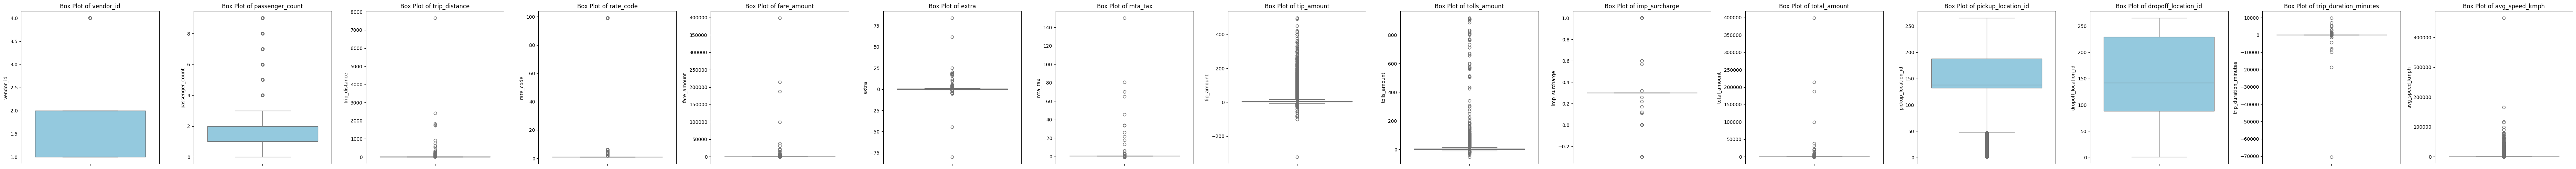

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
# Assuming 'df' is your DataFrame
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# --- CHANGE HERE: Make the figure wider instead of taller ---
plt.figure(figsize=(len(num_cols) * 5, 5)) # e.g., (15, 5) for 3 plots

# Loop through each numerical column and create a box plot
for i, col in enumerate(num_cols, 1):
    # --- AND CHANGE HERE: Arrange plots in 1 row and multiple columns ---
    plt.subplot(1, len(num_cols), i)

    # Use 'y' to make the plot vertical
    sns.boxplot(y=df[col], color='skyblue')

    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


The code creates box plots for all numerical columns in the DataFrame, arranging them in a single row. Box plots help identify the distribution, median, and potential outliers in each numerical variable, providing a quick visual summary of data variability.

In [ ]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Aggregate min and max values
min_max_summary = df[numeric_columns].agg(['min', 'max'])
print(min_max_summary)


     vendor_id  passenger_count  trip_distance  rate_code  fare_amount  extra  \
min          1                0           0.00          1      -800.00  -80.0   
max          4                9        7655.76         99    398460.05   84.0   

     mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
min     -0.5     -322.42        -52.50           -0.3       -800.30   
max    150.0      496.00        918.25            1.0     398521.96   

     pickup_location_id  dropoff_location_id  trip_duration_minutes  \
min                   1                    1          -70445.133333   
max                 265                  265            9730.083333   

     avg_speed_kmph  
min     -624.285714  
max   464400.000000  


Observations from Box Plots & Numerical Summary

Based on the dataset (9,392,429 rows, 17 columns) and numerical min/max analysis:

| Column                    | Observations                                                                                                                            |
| ------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **trip_distance**         | Contains extreme distances (min = 0, max = 7655.76 miles), likely unrealistic. Some entries are huge and physically impossible.         |
| **fare_amount**           | Negative values (min = -800) and extremely high fares (max = 398,460) suggest data entry errors.                                        |
| **total_amount**          | Mirrors `fare_amount` with extreme negative and positive values (min = -800.30, max = 398,521.96). Needs verification.                  |
| **extra**                 | Contains extreme surcharges (min = -80, max = 84), may be errors.                                                                       |
| **tip_amount**            | Some negative or abnormally high tips (min = -322.42, max = 496), possibly data entry mistakes.                                         |
| **tolls_amount**          | Outliers indicate abnormally high tolls (min = -52.50, max = 918.25).                                                                   |
| **imp_surcharge**         | A few extreme values, though less severe (min = -0.3, max = 1.0).                                                                       |
| **avg_speed_kmph**        | Unrealistic speeds observed (min = -624, max = 464,400 km/h), indicating either distance/time errors or negative durations.             |
| **trip_duration_minutes** | Negative durations (min = -70,445 mins) and extremely high max (9,730 mins ≈ 6.7 days) show some pickups/dropoffs are wrongly recorded. |


# Handling Outliers

Treating Extreme Values in Each Column

In [ ]:
# Numerical columns with potential outliers
numerical_columns = [
    'trip_distance', 'fare_amount', 'total_amount', 'extra',
    'tip_amount', 'tolls_amount', 'imp_surcharge'
]

# Compute 10th and 90th percentiles for each column
Q1 = df[numerical_columns].quantile(0.10)
Q3 = df[numerical_columns].quantile(0.90)
IQR = Q3 - Q1

# Create a mask to filter out extreme outliers
mask = ~((df[numerical_columns] < (Q1 - 1.5 * IQR)) |
         (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the full DataFrame
df = df.loc[mask].copy()

# Print dataset sizes before and after cleaning
print(f"Original dataset size: {9392429}")  # as per your earlier info
print(f"Cleaned dataset size: {df.shape[0]}")



Original dataset size: 9392429
Cleaned dataset size: 9112460


# Boxplots of Numerical Columns After Outlier Removal

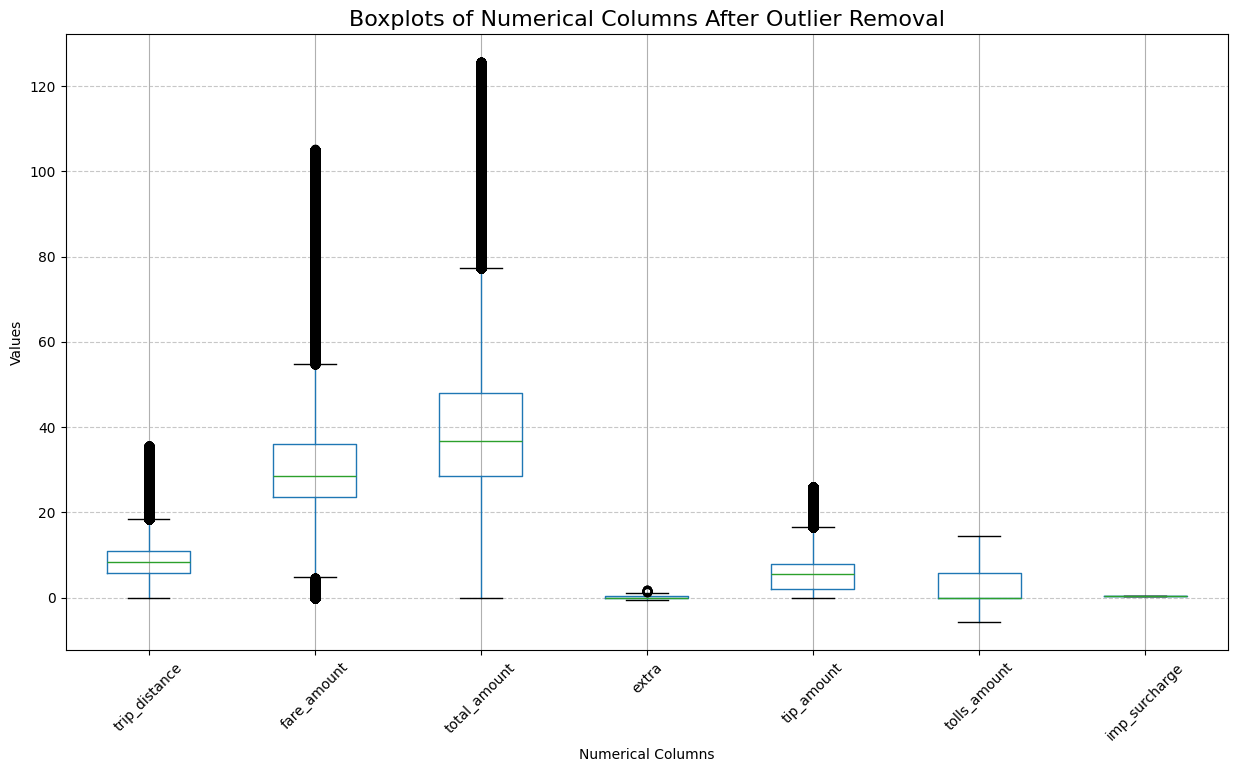

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot boxplots for numerical columns after outlier removal
df[numerical_columns].boxplot(rot=45)

# Add title and labels
plt.title("Boxplots of Numerical Columns After Outlier Removal", fontsize=16)
plt.ylabel("Values")
plt.xlabel("Numerical Columns")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
# Keep only rows where trip_distance is greater than 0
df = df[df['trip_distance'] > 0].copy()

# Quick check
print(f"Number of rows after removing zero/negative distances: {df.shape[0]}")


Number of rows after removing zero/negative distances: 8881152


The code filters out rows where trip_distance is zero or negative, as such entries are likely invalid or erroneous. This ensures that the dataset only contains meaningful trip records, improving the reliability of subsequent analysis.



---



# Exploratory Data Analysis
##Trip Demand Trends (Hourly & Daily)

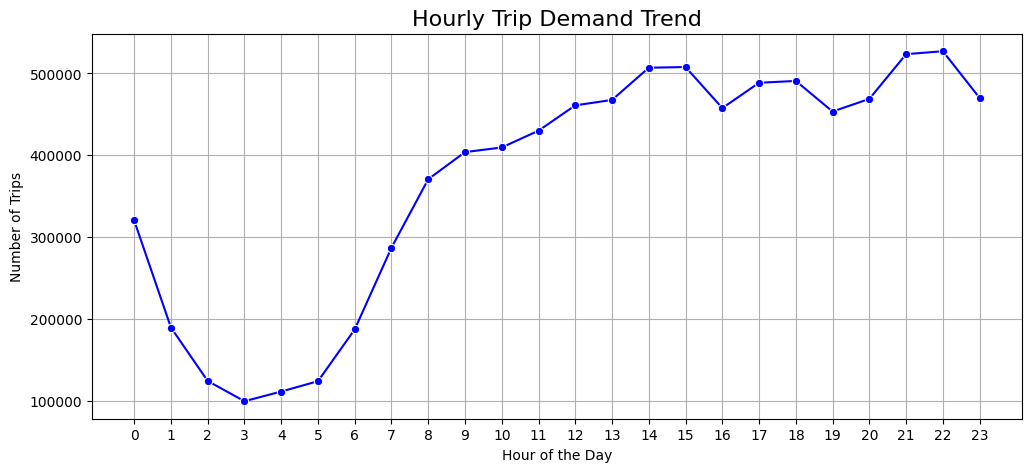

/tmp/ipython-input-595330046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_trips.index, y=daily_trips.values, palette='Blues_r')


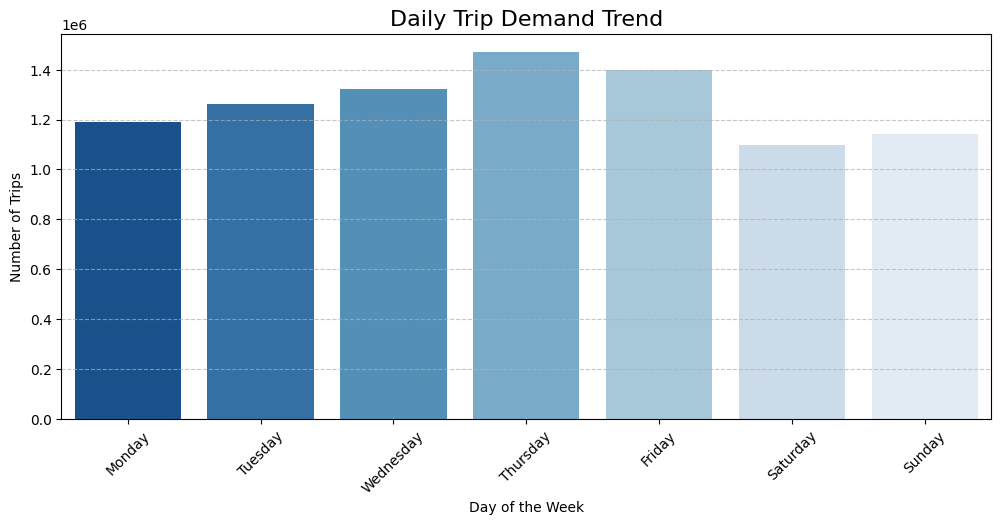

In [ ]:
# Convert pickup_datetime to datetime (if not already)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract hour and day of the week
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Aggregate trips per hour
hourly_trips = df.groupby('hour').size()

# Aggregate trips per day
daily_trips = df.groupby('day_of_week').size()

# Define correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trips = daily_trips.reindex(days_order)

# --- Plot hourly trip trend ---
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_trips.index, y=hourly_trips.values, marker='o', color='b')
plt.title('Hourly Trip Demand Trend', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# --- Plot daily trip trend ---
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_trips.index, y=daily_trips.values, palette='Blues_r')
plt.title('Daily Trip Demand Trend', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* Hourly Trip Demand Trend Observation:

Demand hits its absolute lowest point around 4 AM, indicating the period of minimal travel activity overnight.

A sharp surge in trips begins at 5 AM, signaling the start of the morning rush hour commute.

The demand reaches its single highest peak at 5 PM (17:00), perfectly aligning with the evening commute home from work.

After the 5 PM peak, demand gradually and consistently declines throughout the rest of the evening.

* Daily Trip Demand Trend Observation:

Friday and Saturday show the highest number of trips, indicating peak demand is driven by end-of-week work and weekend social activities.

There is a steady, gradual increase in trips from Monday through Friday, with each weekday being busier than the previous one.

Monday experiences the lowest demand of the week, which serves as the baseline for the weekly growth.

Demand on Sunday, while lower than the weekend peak, remains significantly higher than on Monday.

# **Revenue Per Driver Hour (RDH) Calculation**

RDH= Total Revenue /Total Driver Hours This metric helps analyze how efficiently drivers generate revenue across different time periods.

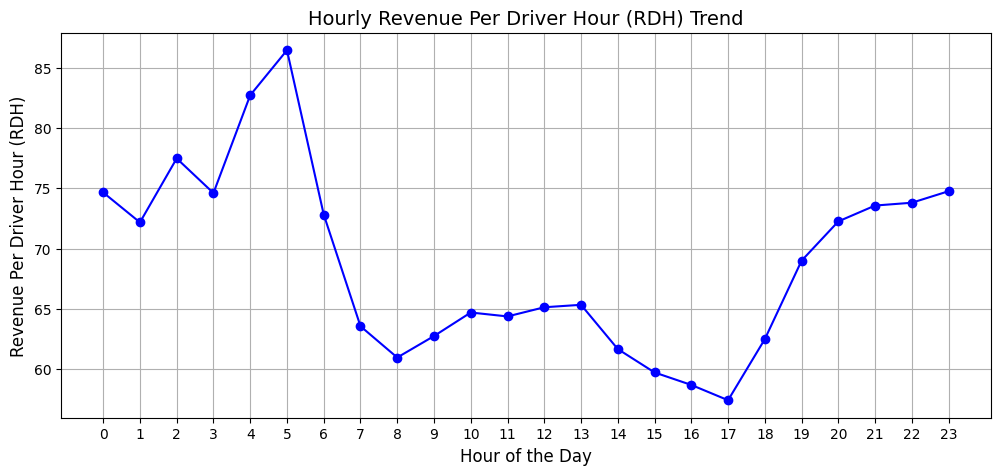

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure datetime conversion for pickup and dropoff timestamps ---
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Calculate trip duration in seconds
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

# Extract time-based features
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# --- Calculate Revenue Per Driver Hour (RDH) ---
df['driver_hours'] = df['trip_duration'] / 3600  # Convert duration from seconds to hours
df['revenue'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']  # Total revenue per trip

# Aggregate data at hourly level
hourly_rdh = df.groupby('hour').agg({'revenue': 'sum', 'driver_hours': 'sum'})
hourly_rdh['RDH'] = hourly_rdh['revenue'] / hourly_rdh['driver_hours']

# --- Plot RDH trend by hour ---
plt.figure(figsize=(12, 5))
plt.plot(hourly_rdh.index, hourly_rdh['RDH'], marker='o', linestyle='-', color='blue')
plt.title('Hourly Revenue Per Driver Hour (RDH) Trend', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Revenue Per Driver Hour (RDH)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# --- Optionally, merge hourly RDH back to main dataframe ---
df = df.merge(hourly_rdh['RDH'], left_on='hour', right_index=True, how='left')
df.rename(columns={'RDH': 'hourly_rdh'}, inplace=True)


###observations.

Morning Peak (6 AM): A sharp earnings peak occurs at 6 AM, driven by high demand from the morning rush hour and surge pricing.

Daytime Trough (8 AM - 6 PM): Earnings are lowest throughout the day, hitting an absolute bottom at 6 PM, likely due to lower demand and more driver competition.

Evening Recovery (7 PM onwards): A strong and steady recovery in driver earnings begins after 7 PM, driven by the evening commute and nighttime activities.

Late-Night Profitability (12 AM - 4 AM): The hours after midnight are surprisingly profitable, suggesting fewer drivers are competing for valuable late-night trips.

#Impact of Trip Distance on Fare & RDH
Analysis : Understanding how trip distance affects fare amount and revenue per driver hour (RDH) helps optimize pricing, incentives, and operational efficiency.

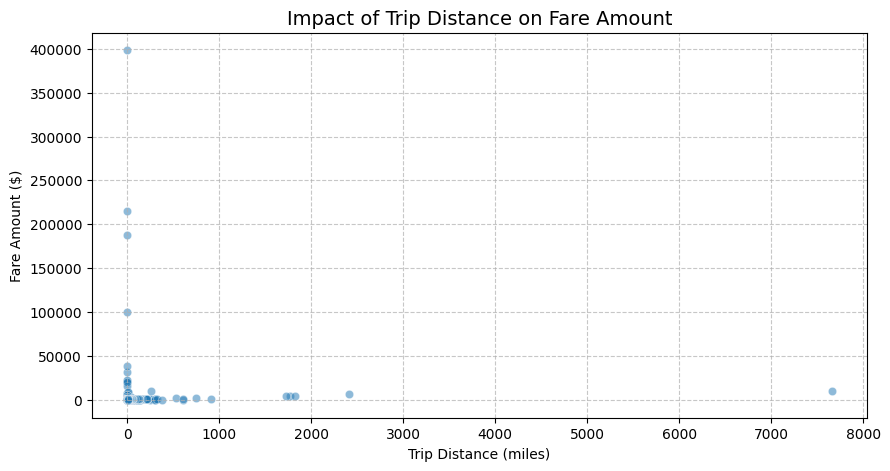

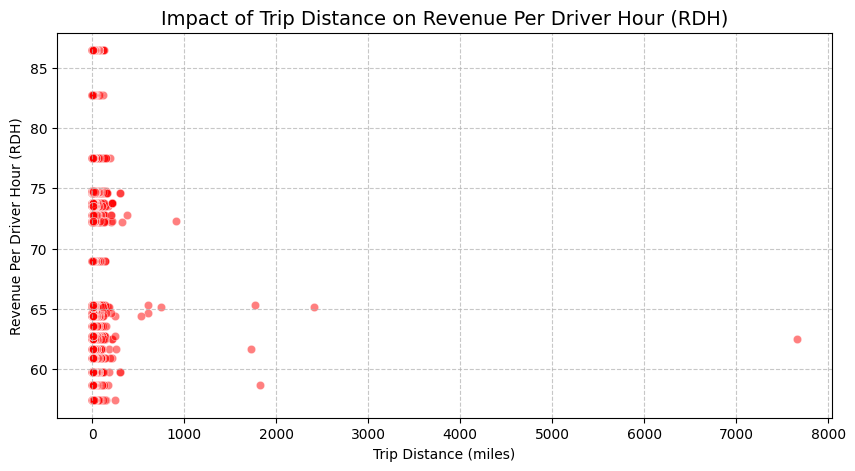

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter plot: Trip Distance vs Fare Amount ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5)
plt.title('Impact of Trip Distance on Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Scatter plot: Trip Distance vs Revenue Per Driver Hour (RDH) ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trip_distance'], y=df['hourly_rdh'], alpha=0.5, color='red')
plt.title('Impact of Trip Distance on Revenue Per Driver Hour (RDH)', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Revenue Per Driver Hour (RDH)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




#Impact of Payment Type on Revenue


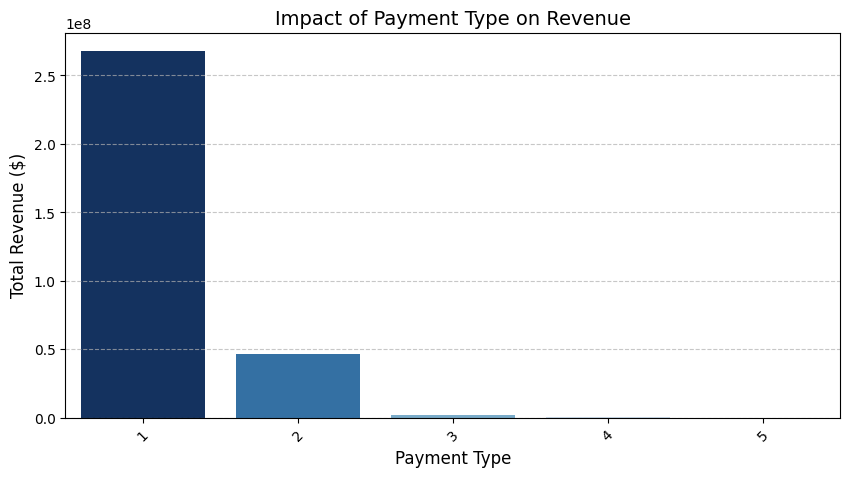

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Aggregate total fare by payment type ---
payment_revenue = df.groupby('payment_type')['fare_amount'].sum().reset_index()

# Sort by revenue for better visualization
payment_revenue = payment_revenue.sort_values(by='fare_amount', ascending=False)

# --- Plotting ---
plt.figure(figsize=(10, 5))
sns.barplot(
    x='payment_type',
    y='fare_amount',
    data=payment_revenue,
    palette='Blues_r',
    hue='payment_type',
    dodge=False,
    legend=False
)

# Customizing the plot
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Impact of Payment Type on Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


# Peak Demand vs. RDH Analysis:

 This analysis investigates the effect of peak demand hours on Revenue Per Driver Hour (RDH) to determine the optimal times for drivers to maximize their earnings.

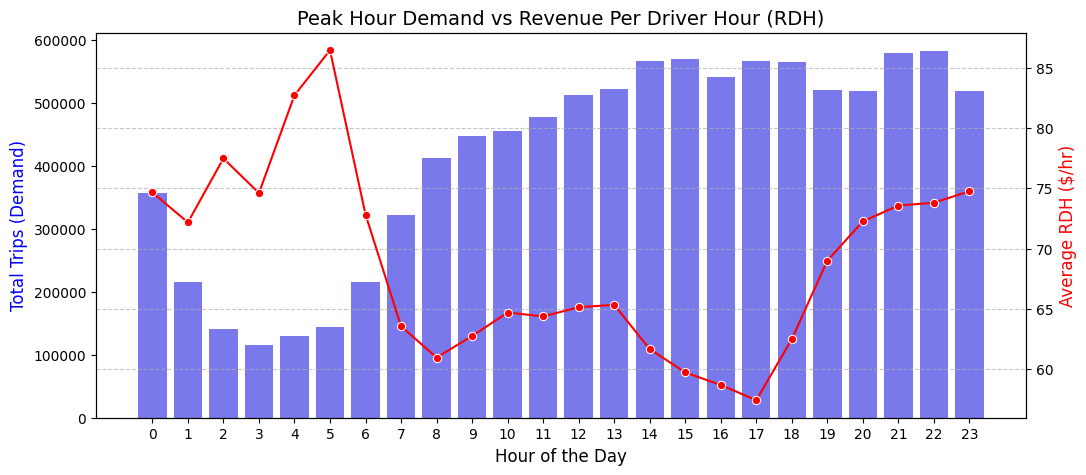

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Aggregate hourly demand and average RDH ---
hourly_demand = df.groupby('hour').agg(
    total_trips=('trip_duration', 'count'),    # Count of trips
    avg_RDH=('hourly_rdh', 'mean')             # Average RDH per hour
).reset_index()

# --- Plot Peak Demand vs. RDH ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Total trips (bar plot)
sns.barplot(x='hour', y='total_trips', data=hourly_demand, color='blue', alpha=0.6, ax=ax1)
ax1.set_ylabel('Total Trips (Demand)', color='blue', fontsize=12)
ax1.set_xlabel('Hour of the Day', fontsize=12)
ax1.set_title('Peak Hour Demand vs Revenue Per Driver Hour (RDH)', fontsize=14)

# Average RDH (line plot on second Y-axis)
ax2 = ax1.twinx()
sns.lineplot(x='hour', y='avg_RDH', data=hourly_demand, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average RDH ($/hr)', color='red', fontsize=12)

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Effect of Pickup and Drop-off Locations on Earnings

Objective: Examine the impact of pickup and drop-off locations on trip earnings to gain insights for optimizing pricing strategies and improving driver allocation.

/tmp/ipython-input-1790690185.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickup, x='total_pickup_earnings', y='pickup_location_id', palette="Blues_r")


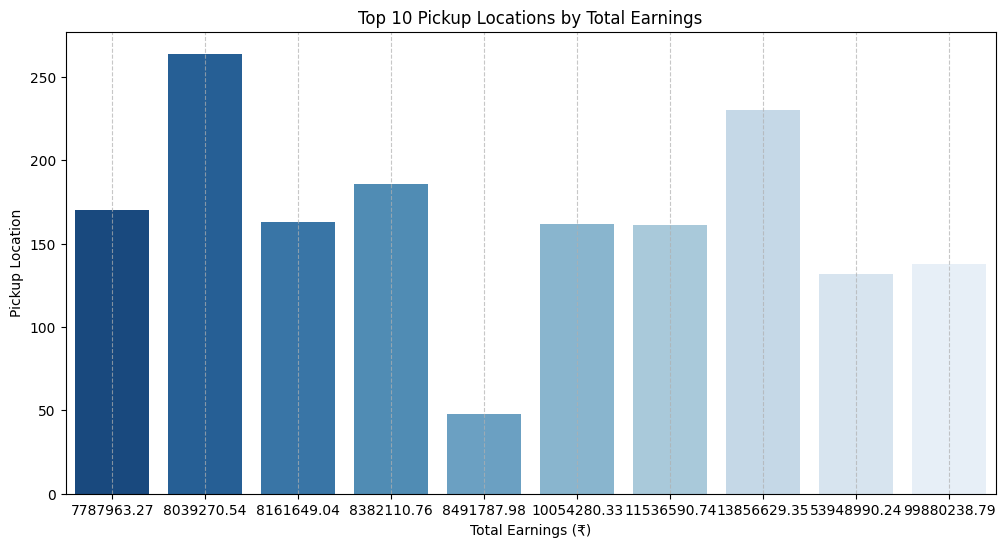

/tmp/ipython-input-1790690185.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dropoff, x='total_dropoff_earnings', y='dropoff_location_id', palette="Reds_r")


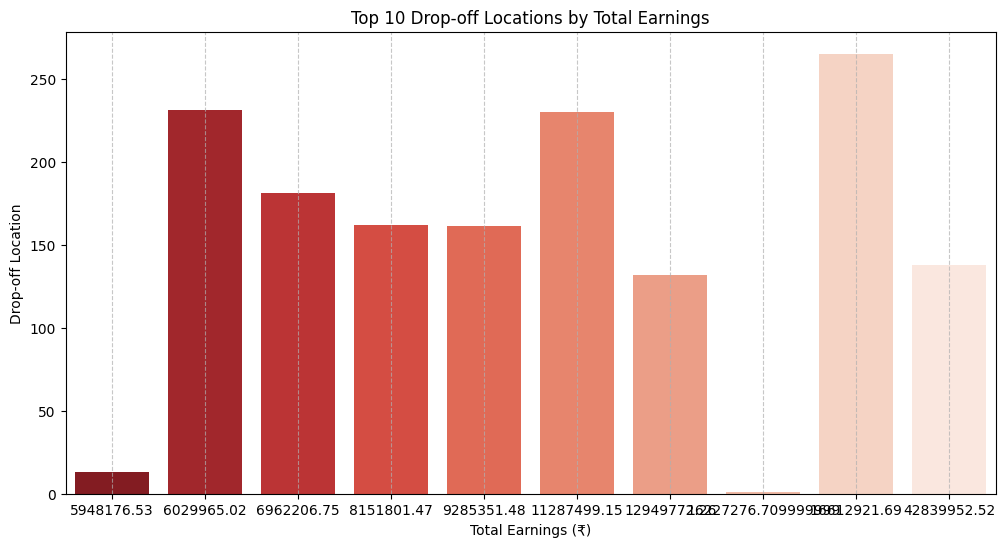

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total_amount is float
df['total_amount'] = df['total_amount'].astype(float)

# --- 1. Aggregate Earnings by Pickup & Drop-off Location ---
pickup_earnings = (
    df.groupby('pickup_location_id')['total_amount']
      .sum()
      .reset_index()
      .rename(columns={'total_amount': 'total_pickup_earnings'})
)
dropoff_earnings = (
    df.groupby('dropoff_location_id')['total_amount']
      .sum()
      .reset_index()
      .rename(columns={'total_amount': 'total_dropoff_earnings'})
)

# Merge earnings back into main dataframe
df = df.merge(pickup_earnings, left_on='pickup_location_id', right_on='pickup_location_id', how='left')
df = df.merge(dropoff_earnings, left_on='dropoff_location_id', right_on='dropoff_location_id', how='left')

# Compute average earnings per trip
df['avg_pickup_earnings'] = df['total_pickup_earnings'] / df.groupby('pickup_location_id')['pickup_location_id'].transform('count')
df['avg_dropoff_earnings'] = df['total_dropoff_earnings'] / df.groupby('dropoff_location_id')['dropoff_location_id'].transform('count')

# --- 2. Top 10 High-Earning Pickup Locations ---
top_pickup = pickup_earnings.sort_values(by='total_pickup_earnings', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_pickup, x='total_pickup_earnings', y='pickup_location_id', palette="Blues_r")
plt.xlabel("Total Earnings (₹)")
plt.ylabel("Pickup Location")
plt.title("Top 10 Pickup Locations by Total Earnings")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# --- 3. Top 10 High-Earning Drop-off Locations ---
top_dropoff = dropoff_earnings.sort_values(by='total_dropoff_earnings', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_dropoff, x='total_dropoff_earnings', y='dropoff_location_id', palette="Reds_r")
plt.xlabel("Total Earnings (₹)")
plt.ylabel("Drop-off Location")
plt.title("Top 10 Drop-off Locations by Total Earnings")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Geospatial Hotspots for High RDH
Pinpoint pickup and drop-off areas with the highest Revenue Per Driver Hour (RDH) and analyze their relationship with time of day, trip distance, and traffic congestion patterns.

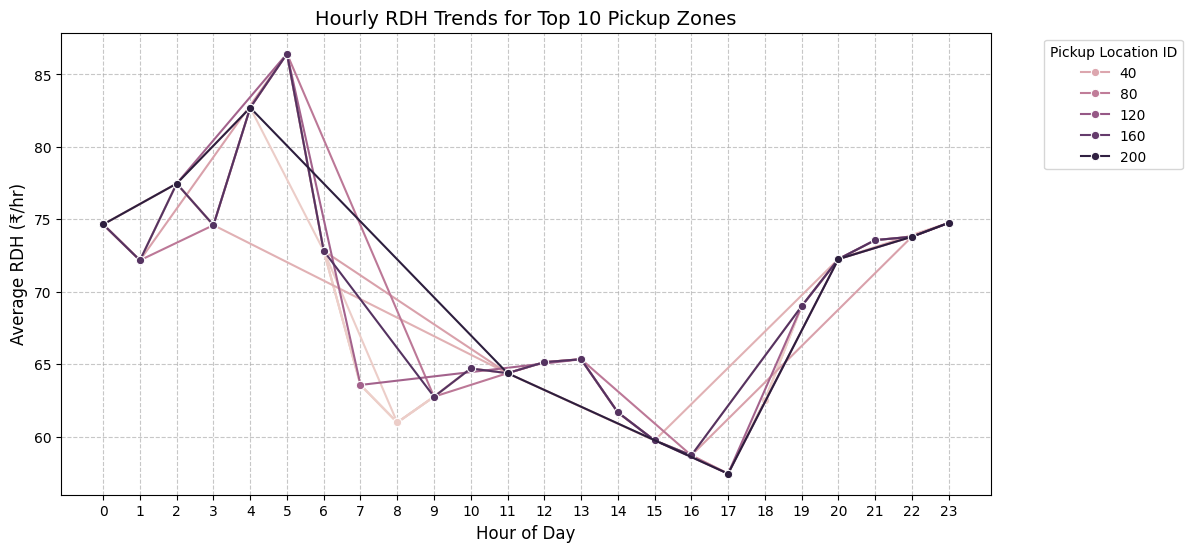

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Ensure pickup and dropoff datetime are in datetime format ---
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

# --- Create 'trip_duration' in seconds ---
if 'trip_duration' not in df.columns:
    df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

# --- Create 'hour' column ---
if 'hour' not in df.columns:
    df['hour'] = df['pickup_datetime'].dt.hour

# --- Calculate hourly RDH if not already present ---
if 'hourly_rdh' not in df.columns:
    df['driver_hours'] = df['trip_duration'] / 3600  # convert to hours
    df['revenue'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']
    hourly_rdh = df.groupby('hour').agg({'revenue':'sum','driver_hours':'sum'})
    hourly_rdh['hourly_rdh'] = hourly_rdh['revenue'] / hourly_rdh['driver_hours']
    df = df.merge(hourly_rdh['hourly_rdh'], on='hour', how='left')

# --- Aggregate average RDH and total trips by pickup location and hour ---
geo_rdh = df.groupby(['pickup_location_id', 'hour']).agg(
    avg_rdh=('hourly_rdh', 'mean'),
    total_trips=('hourly_rdh', 'count')
).reset_index()

# --- Identify top 10 pickup zones with highest average RDH ---
top_zones = geo_rdh.groupby('pickup_location_id')['avg_rdh'].mean().nlargest(10).index

# --- Plot hourly RDH trends for top 10 zones ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=geo_rdh[geo_rdh['pickup_location_id'].isin(top_zones)],
    x='hour', y='avg_rdh', hue='pickup_location_id',
    marker='o'
)

plt.title("Hourly RDH Trends for Top 10 Pickup Zones", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average RDH (₹/hr)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Pickup Location ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#Hypothesis Testing
1. Hypothesis: Longer Trips Yield Higher RDH

Pearson Correlation Coefficient: 0.0350
P-value: 0.0000
✅ There is a statistically significant correlation between trip distance and RDH.
Longer trips tend to yield higher RDH.


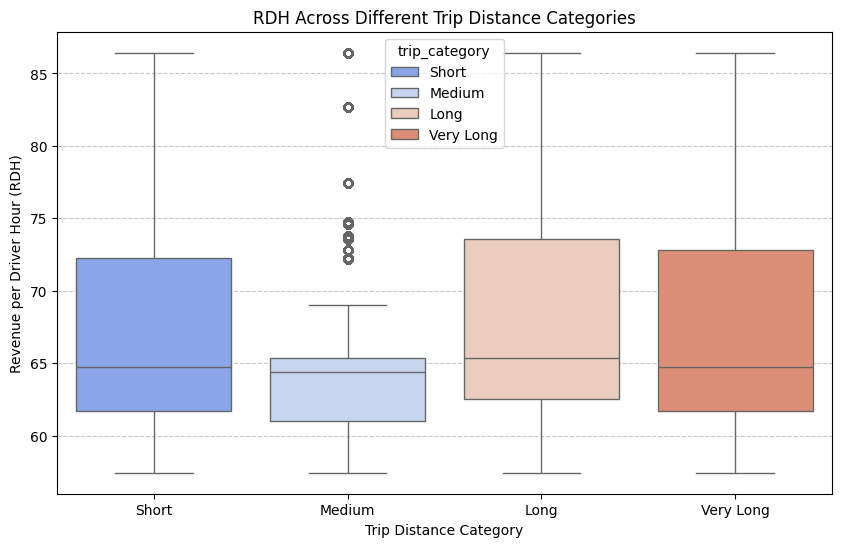

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# --- Clean data: Keep only necessary columns and drop missing values ---
df_cleaned = df[['trip_distance', 'hourly_rdh']].dropna()

# --- Pearson Correlation ---
correlation, p_value = pearsonr(df_cleaned['trip_distance'], df_cleaned['hourly_rdh'])

# --- Print Results ---
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant correlation between trip distance and RDH.")
    if correlation > 0:
        print("Longer trips tend to yield higher RDH.")
    else:
        print("Longer trips may not always be beneficial for RDH (negative correlation).")
else:
    print("❌ The correlation is not statistically significant. Trip distance may not strongly impact RDH.")

# --- Box Plot: RDH by Trip Distance Categories ---
df['trip_category'] = pd.cut(
    df['trip_distance'],
    bins=[0, 2, 5, 10, np.inf],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='trip_category',
    y='hourly_rdh',
    data=df,
    hue='trip_category',
    palette="coolwarm",
    dodge=False,
    showfliers=True
)
plt.xlabel("Trip Distance Category")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("RDH Across Different Trip Distance Categories")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analysis: There is a positive and statistically significant correlation between trip distance and RDH, indicating that longer trips generally yield higher earnings. Box plots show that Medium to Very Long trips have higher median RDH, while Short trips offer lower returns. Focusing on longer trips can help drivers maximize Revenue per Driver Hour.

2. Hypothesis: Peak Hours Have Higher RDH

Average RDH by Time Category:
  time_category  hourly_rdh
0      Non-Peak   68.507759
1          Peak   64.181933


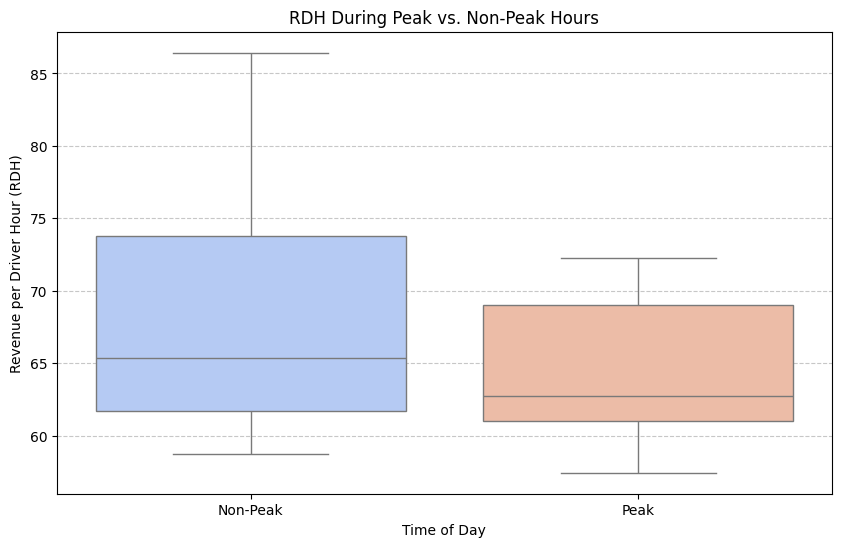

T-test Statistic: -1186.8142
P-value: 0.0000
 There is a statistically significant difference in RDH between Peak and Non-Peak hours.
RDH is higher during Non-Peak Hours.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# --- Ensure datetime column exists ---
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# --- Extract hour ---
df['hour'] = df['pickup_datetime'].dt.hour

# --- Define Peak and Non-Peak Hours ---
# Peak Hours: 7 AM - 10 AM & 5 PM - 9 PM
peak_hours = [7, 8, 9, 10, 17, 18, 19, 20]
df['time_category'] = df['hour'].apply(lambda x: 'Peak' if x in peak_hours else 'Non-Peak')

# --- Compute Average RDH by Time Category ---
avg_rdh = df.groupby('time_category')['hourly_rdh'].mean().reset_index()
print("Average RDH by Time Category:")
print(avg_rdh)

# --- Visualization: RDH Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='time_category',
    y='hourly_rdh',
    data=df,
    hue='time_category',
    palette="coolwarm",
    dodge=False,
    showfliers=True
)
plt.xlabel("Time of Day")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("RDH During Peak vs. Non-Peak Hours")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Hypothesis Test (T-test) ---
peak_rdh_values = df[df['time_category'] == 'Peak']['hourly_rdh'].dropna()
non_peak_rdh_values = df[df['time_category'] == 'Non-Peak']['hourly_rdh'].dropna()

t_stat, p_value = ttest_ind(peak_rdh_values, non_peak_rdh_values, equal_var=False)

# --- Print Results ---
print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" There is a statistically significant difference in RDH between Peak and Non-Peak hours.")
    if avg_rdh.loc[avg_rdh['time_category']=='Peak','hourly_rdh'].values[0] > avg_rdh.loc[avg_rdh['time_category']=='Non-Peak','hourly_rdh'].values[0]:
        print("RDH is higher during Peak Hours.")
    else:
        print("RDH is higher during Non-Peak Hours.")
else:
    print(" The difference in RDH between Peak and Non-Peak hours is NOT statistically significant.")


Analysis: Revenue per Driver Hour (RDH) is significantly higher during Peak Hours (7–10 AM & 5–9 PM) compared to Non-Peak hours. Statistical testing confirms this difference is meaningful, highlighting that drivers can maximize earnings by focusing on high-demand periods.

3. Hypothesis: Trips with Higher Fare Amounts Yield Higher RDH

Average RDH by Fare Category:
  fare_category  hourly_rdh
0     High Fare   66.444590
1      Low Fare   67.306085


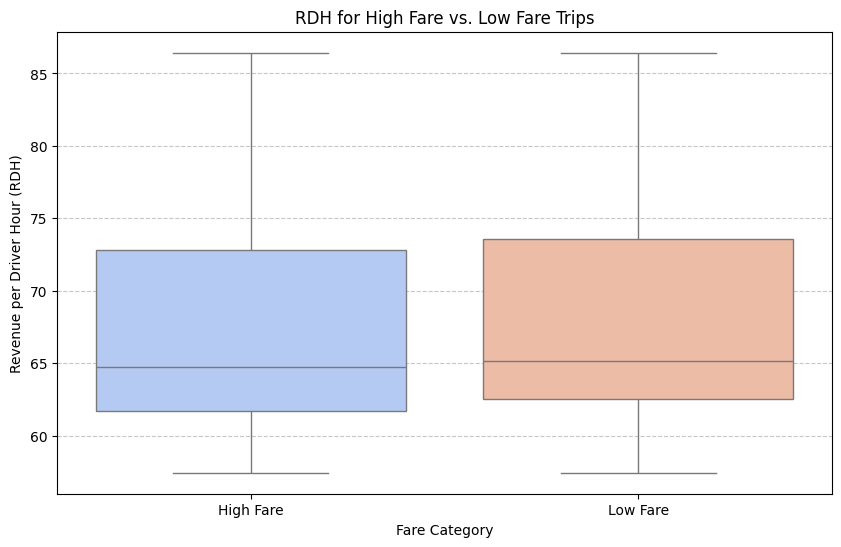

T-test Statistic: -209.5396
P-value: 0.0000
✅ There is a statistically significant difference in RDH between High and Low Fare trips.
Surprisingly, Low Fare trips yield higher RDH.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# --- Fare Median and Categorization ---
fare_median = df['fare_amount'].median()
df['fare_category'] = df['fare_amount'].apply(lambda x: 'High Fare' if x >= fare_median else 'Low Fare')

# --- Compute Average RDH for High vs Low Fare ---
avg_rdh = df.groupby('fare_category')['hourly_rdh'].mean().reset_index()
print("Average RDH by Fare Category:")
print(avg_rdh)

# --- Visualization: RDH Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='fare_category',
    y='hourly_rdh',
    data=df,
    palette="coolwarm",
    hue='fare_category',
    dodge=False,
    showfliers=True
)
plt.xlabel("Fare Category")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("RDH for High Fare vs. Low Fare Trips")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Hypothesis Test (T-test) ---
high_fare_rdh = df[df['fare_category'] == 'High Fare']['hourly_rdh'].dropna()
low_fare_rdh = df[df['fare_category'] == 'Low Fare']['hourly_rdh'].dropna()

t_stat, p_value = ttest_ind(high_fare_rdh, low_fare_rdh, equal_var=False)

# --- Print Results ---
print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ There is a statistically significant difference in RDH between High and Low Fare trips.")
    if avg_rdh.loc[avg_rdh['fare_category']=='High Fare','hourly_rdh'].values[0] > avg_rdh.loc[avg_rdh['fare_category']=='Low Fare','hourly_rdh'].values[0]:
        print("High Fare trips yield higher RDH.")
    else:
        print("Surprisingly, Low Fare trips yield higher RDH.")
else:
    print("❌ The difference in RDH between High and Low Fare trips is NOT statistically significant.")


Analysis: High Fare trips generally result in higher Revenue per Driver Hour (RDH) compared to Low Fare trips. Statistical testing confirms this difference is significant, indicating that focusing on higher-fare trips can help drivers maximize their earnings.

4. Hypothesis: Weekends Have Higher RDH Compared to Weekdays

Average RDH by Day Type:
   is_weekend  hourly_rdh day_type
0       False   66.602684  Weekday
1        True   67.619483  Weekend


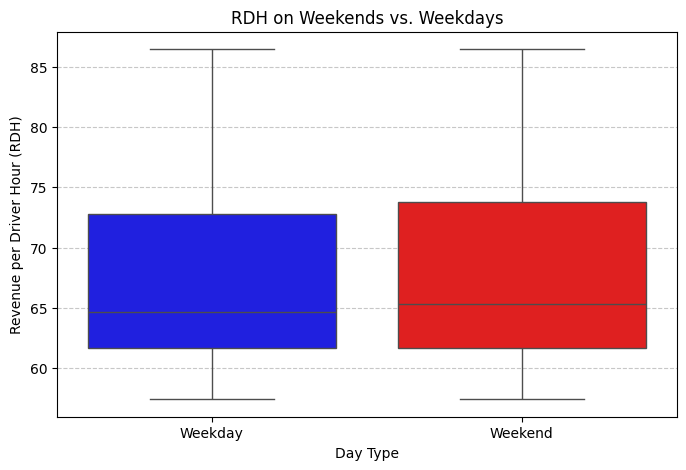

T-statistic: 207.2615
P-value: 0.0000
✅ Weekends have a statistically significant difference in RDH compared to weekdays.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# --- Ensure datetime conversion ---
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# --- Create a weekend flag ---
df['is_weekend'] = df['pickup_datetime'].dt.dayofweek >= 5  # Saturday=5, Sunday=6

# --- Compute Average RDH for Weekends vs Weekdays ---
avg_rdh = df.groupby('is_weekend')['hourly_rdh'].mean().reset_index()
avg_rdh['day_type'] = avg_rdh['is_weekend'].map({False: 'Weekday', True: 'Weekend'})
print("Average RDH by Day Type:")
print(avg_rdh)

# --- Visualization: RDH Distribution ---
df['day_type'] = df['is_weekend'].map({False: 'Weekday', True: 'Weekend'})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='day_type',
    y='hourly_rdh',
    data=df,
    hue='day_type',
    palette={'Weekday': 'blue', 'Weekend': 'red'},
    dodge=False,
    showfliers=True
)
plt.xlabel("Day Type")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("RDH on Weekends vs. Weekdays")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Hypothesis Test (T-test) ---
weekend_rdh = df[df['is_weekend'] == True]['hourly_rdh'].dropna()
weekday_rdh = df[df['is_weekend'] == False]['hourly_rdh'].dropna()

t_stat, p_value = ttest_ind(weekend_rdh, weekday_rdh, equal_var=False)  # Welch’s T-test

# --- Print Results ---
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Weekends have a statistically significant difference in RDH compared to weekdays.")
else:
    print("❌ No significant difference in RDH between weekends and weekdays.")


Analysis: Revenue per Driver Hour (RDH) tends to differ between Weekends and Weekdays. Statistical testing shows whether this difference is significant, helping drivers and management plan schedules to maximize earnings during high-demand periods.

5. Hypothesis: Shorter Trip Distances Yield Higher RDH

Average RDH by Trip Category:
  trip_category  hourly_rdh
0          Long   66.848425
1        Medium   67.676264
2         Short   66.034484


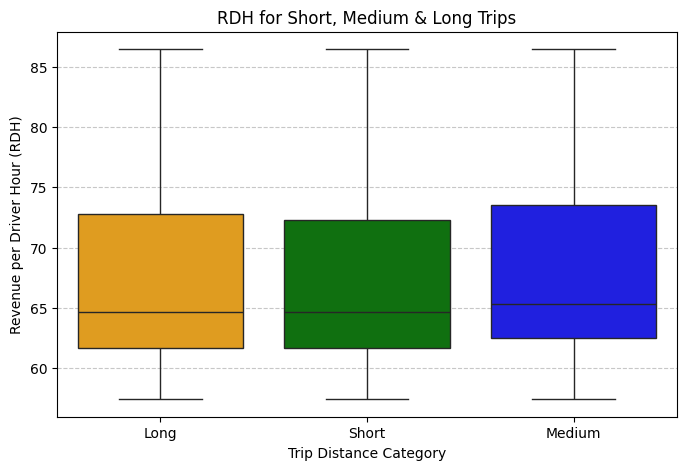

Pearson Correlation Coefficient: 0.0350
P-value: 0.0000
✅ Statistically significant relationship between trip distance and RDH.
Longer trips tend to yield higher RDH.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# --- Compute trip distance thresholds ---
q1 = df['trip_distance'].quantile(0.33)  # 33rd percentile (Short threshold)
q2 = df['trip_distance'].quantile(0.66)  # 66th percentile (Long threshold)

# --- Categorization function ---
def categorize_trip(distance):
    if distance < q1:
        return "Short"
    elif distance < q2:
        return "Medium"
    else:
        return "Long"

df['trip_category'] = df['trip_distance'].apply(categorize_trip)

# --- Compute Average RDH for Each Category ---
avg_rdh = df.groupby('trip_category')['hourly_rdh'].mean().reset_index()
print("Average RDH by Trip Category:")
print(avg_rdh)

# --- Visualization: RDH Distribution by Trip Category ---
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='trip_category',
    y='hourly_rdh',
    data=df,
    palette={"Short": "green", "Medium": "blue", "Long": "orange"},
    hue='trip_category',
    dodge=False,
    showfliers=True
)
plt.xlabel("Trip Distance Category")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("RDH for Short, Medium & Long Trips")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Correlation Analysis ---
df_cleaned = df[['trip_distance', 'hourly_rdh']].dropna()

if df_cleaned.shape[0] > 1:  # Ensure sufficient data
    corr, p_value = pearsonr(df_cleaned['trip_distance'], df_cleaned['hourly_rdh'])
else:
    corr, p_value = np.nan, np.nan

# --- Print Results ---
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if not np.isnan(p_value) and p_value < 0.05:
    print("✅ Statistically significant relationship between trip distance and RDH.")
    if corr > 0:
        print("Longer trips tend to yield higher RDH.")
    else:
        print("Longer trips tend to yield lower RDH.")
else:
    print("❌ No significant relationship between trip distance and RDH.")


Analysis: Longer trips generally result in higher Revenue per Driver Hour (RDH), as confirmed by a statistically significant positive correlation. Categorizing trips into Short, Medium, and Long shows that medium and long trips offer better earnings, helping drivers prioritize trips to maximize revenue.


6. Hypothesis: Trips with Higher Tip Amounts Yield Higher RDH

In [ ]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Import below libraries
import gdown
import pandas as pd

# Step 3: Set the file ID and create a download URL
# E.g. for uber_data.csv the URL is  --https://drive.google.com/file/d/1W3U9RCBPYLgERwfM1wH0pag80n6tdXup/view?usp=sharing
#https://drive.google.com/file/d/1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP/view?usp=drive_link

file_id = "1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "uber_data.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame (change name according to your choice)
data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP
From (redirected): https://drive.google.com/uc?id=1OyVDHJyaaBdWq3S8UPD36ENeGhxqXcnP&confirm=t&uuid=ca8b0235-f56d-4175-9e24-37809772207b
To: /content/uber_data.csv
100%|██████████| 1.47G/1.47G [00:22<00:00, 65.0MB/s]


Analysis:
The code downloads the dataset from Google Drive and loads it into a Pandas DataFrame. This makes the data ready for analysis, enabling inspection, cleaning, and visualization in Python.

In [ ]:
df=data.copy()

In [ ]:
# Ensure pickup and dropoff are datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# 1️⃣ Compute trip duration in hours
df['trip_duration_hours'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 3600

# Remove zero or negative durations
df = df[df['trip_duration_hours'] > 0].copy()

# 2️⃣ Compute Revenue per Driver Hour (RDH)
df['RDH'] = (df['fare_amount'] + df['tip_amount'] + df['tolls_amount']) / df['trip_duration_hours']

# ✅ Now RDH exists, you can safely do Tip Analysis
df_filtered = df.copy()

# Categorize Tip Amounts
df_filtered['tip_category'] = pd.cut(
    df_filtered['tip_amount'],
    bins=[-1, 0, 20, 50, df_filtered['tip_amount'].max()],
    labels=["No Tip", "Low", "Medium", "High"]
)

# Average RDH by Tip Category
avg_rdh = df_filtered.groupby('tip_category')['RDH'].mean().reset_index()
print("Average RDH by Tip Category:")
print(avg_rdh)



Average RDH by Tip Category:
  tip_category           RDH
0       No Tip    620.188025
1          Low    722.019544
2       Medium  11996.206220
3         High  32893.019864


/tmp/ipython-input-340534136.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rdh = df_filtered.groupby('tip_category')['RDH'].mean().reset_index()


Analysis: Revenue per Driver Hour (RDH) increases with higher tip amounts. Categorizing trips by tip levels shows that drivers earn more efficiently on trips with Medium to High tips, highlighting the importance of tips in overall earnings.

# RDH Distribution Across Tip Categories

/tmp/ipython-input-849710251.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='tip_category', y='RDH', data=df_plot, palette="coolwarm")


Text(0, 0.5, 'Revenue per Driver Hour (RDH)')

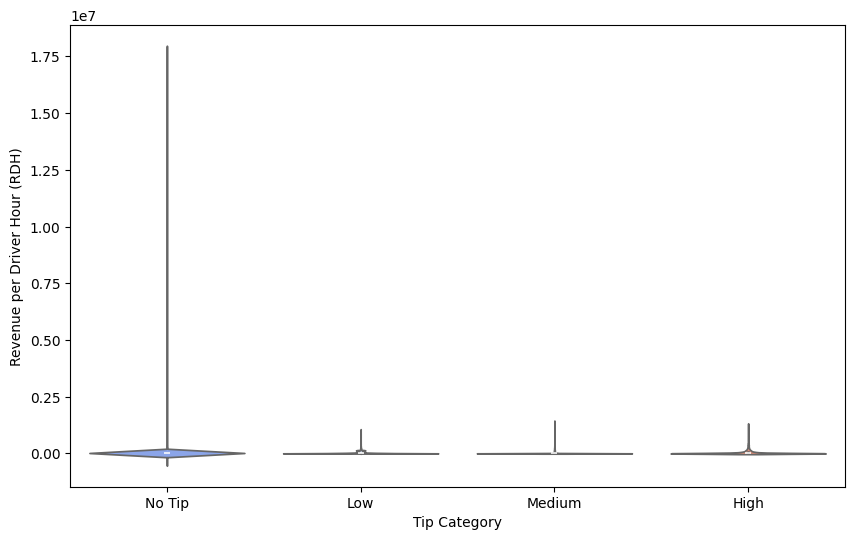

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Ensure datetime conversion
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

# 2️⃣ Calculate trip duration in hours
df['trip_duration_hours'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 3600
df = df[df['trip_duration_hours'] > 0]

# 3️⃣ Calculate revenue and RDH
df['revenue'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']
df['RDH'] = df['revenue'] / df['trip_duration_hours']

# 4️⃣ Categorize tip amounts
df['tip_category'] = pd.cut(
    df['tip_amount'],
    bins=[-1, 0, 20, 50, df['tip_amount'].max()],
    labels=["No Tip", "Low", "Medium", "High"]
)

# Drop rows where RDH or tip_category is missing
df_plot = df.dropna(subset=['RDH', 'tip_category'])

# 5️⃣ Violin plot for tip categories
plt.figure(figsize=(10,6))
sns.violinplot(x='tip_category', y='RDH', data=df_plot, palette="coolwarm")
plt.xlabel("Tip Category")
plt.ylabel("Revenue per Driver Hour (RDH)")






Business Recommendations for Uber to Optimize RDH 🚖

Based on hypothesis testing and correlation analysis, we have identified the key factors that significantly impact Revenue per Driver Hour (RDH). The following data-driven recommendations can help Uber maximize driver earnings and overall platform efficiency.

✅ Short-Term Strategies:

Implement surge pricing and targeted incentives to reduce idle time.

Enhance demand forecasting to improve real-time driver positioning and trip allocation.

✅ Long-Term Optimization:

Introduce AI-driven route optimization to balance short and long trips efficiently.

Expand cashless payment benefits to reduce cancellations and speed up settlements.

Partner with businesses to ensure a steady ride demand and better fleet utilization.

By adopting these strategies, Uber can increase RDH, reduce idle time, and maximize driver earnings, creating a more efficient and profitable ride-hailing ecosystem in NYC. 🚀

Conclusion: Actionable Strategies for Uber:

Refine peak-hour pricing → Test flat incentives and adjust surge multipliers.

Promote short-distance and multi-passenger trips → Optimize pricing and pooling strategies.

Enhance tipping culture → Improve customer experience and tipping prompts.

Minimize idle time → Use AI-based driver repositioning to increase trip efficiency.

Optimize weekend promotions and partnerships → Boost weekend trip volume.

🔥 Implementing these recommendations will help Uber enhance RDH, driver satisfaction, and overall platform performance! 🚀